# Conditional GAN MNIST NUMBERS DATASET

## Import and Preprocess the Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os

#### Check if GPU is available

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Load the MNIST dataset and preprocess

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

### Define the Generator Model

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, n_classes=10):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(n_classes, 10)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 10, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embedding = self.embedding(labels)
        noise_concat = torch.cat([noise, label_embedding], dim=1)
        img = self.model(noise_concat)
        return img.view(img.size(0), 1, 28, 28)

### Define the Discriminator Model

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, n_classes=10):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(n_classes, 10)
        self.model = nn.Sequential(
            nn.Linear(28 * 28 + 10, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        img = img.view(img.size(0), 28 * 28)
        label_embedding = self.embedding(labels)
        img_concat = torch.cat([img, label_embedding], dim=1)
        return self.model(img_concat)

### Initialize models, optimizers, and loss function

In [ ]:
latent_dim = 100
generator = Generator(latent_dim=latent_dim).to(device)
discriminator = Discriminator().to(device)

optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.5, 0.999))

criterion = nn.BCELoss()

### Save the model after training

In [ ]:
def save_model(generator, discriminator, epoch, path='models'):
    if not os.path.exists(path):
        os.makedirs(path)
    torch.save(generator.state_dict(), f'{path}/generator_epoch_{epoch}.pth')
    torch.save(discriminator.state_dict(), f'{path}/discriminator_epoch_{epoch}.pth')
    print(f'Models saved at epoch {epoch}.')




### Load the model for later use

In [ ]:
def load_model(generator, discriminator, epoch, path='models'):
    generator.load_state_dict(torch.load(f'{path}/generator_epoch_{epoch}.pth'))
    discriminator.load_state_dict(torch.load(f'{path}/discriminator_epoch_{epoch}.pth'))
    print(f'Models loaded from epoch {epoch}.')

Epoch [1/150] | D Loss: 0.2260 | G Loss: 2.9720
Epoch [2/150] | D Loss: 0.0643 | G Loss: 4.9206
Epoch [3/150] | D Loss: 0.0156 | G Loss: 7.7468
Epoch [4/150] | D Loss: 0.0199 | G Loss: 6.9227
Epoch [5/150] | D Loss: 0.0777 | G Loss: 6.6890
Epoch [6/150] | D Loss: 0.2067 | G Loss: 3.9915
Epoch [7/150] | D Loss: 0.0725 | G Loss: 4.8178
Epoch [8/150] | D Loss: 0.1026 | G Loss: 6.0151
Epoch [9/150] | D Loss: 0.0413 | G Loss: 7.5594
Epoch [10/150] | D Loss: 0.0750 | G Loss: 6.7233
Epoch [11/150] | D Loss: 0.1536 | G Loss: 6.5981
Epoch [12/150] | D Loss: 0.2789 | G Loss: 5.6274
Epoch [13/150] | D Loss: 0.1510 | G Loss: 4.9548
Epoch [14/150] | D Loss: 0.2680 | G Loss: 4.6660
Epoch [15/150] | D Loss: 0.1979 | G Loss: 4.4993
Epoch [16/150] | D Loss: 0.4104 | G Loss: 5.6838
Epoch [17/150] | D Loss: 0.2797 | G Loss: 4.1067
Epoch [18/150] | D Loss: 0.3783 | G Loss: 4.0837
Epoch [19/150] | D Loss: 0.2195 | G Loss: 3.9739
Epoch [20/150] | D Loss: 0.2679 | G Loss: 3.2961


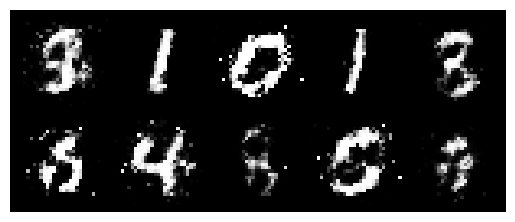

Epoch [21/150] | D Loss: 0.4133 | G Loss: 3.4735
Epoch [22/150] | D Loss: 0.4034 | G Loss: 2.6601
Epoch [23/150] | D Loss: 0.3396 | G Loss: 2.8469
Epoch [24/150] | D Loss: 0.3761 | G Loss: 3.3288
Epoch [25/150] | D Loss: 0.4228 | G Loss: 3.0053
Epoch [26/150] | D Loss: 0.4782 | G Loss: 4.0709
Epoch [27/150] | D Loss: 0.4648 | G Loss: 2.7075
Epoch [28/150] | D Loss: 0.9052 | G Loss: 1.6804
Epoch [29/150] | D Loss: 0.5033 | G Loss: 2.2671
Epoch [30/150] | D Loss: 0.4884 | G Loss: 2.9810
Epoch [31/150] | D Loss: 0.4288 | G Loss: 2.3468
Epoch [32/150] | D Loss: 0.3929 | G Loss: 2.6105
Epoch [33/150] | D Loss: 0.5989 | G Loss: 1.9765
Epoch [34/150] | D Loss: 0.4691 | G Loss: 2.8095
Epoch [35/150] | D Loss: 0.7235 | G Loss: 2.2429
Epoch [36/150] | D Loss: 0.6025 | G Loss: 1.7898
Epoch [37/150] | D Loss: 0.5957 | G Loss: 3.2204
Epoch [38/150] | D Loss: 0.6150 | G Loss: 2.4212
Epoch [39/150] | D Loss: 0.8666 | G Loss: 3.3759
Epoch [40/150] | D Loss: 0.6295 | G Loss: 2.6428


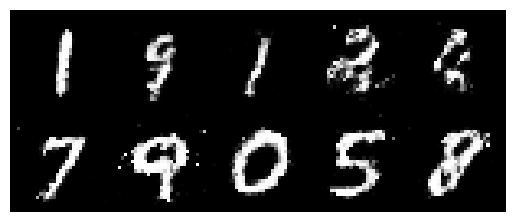

Epoch [41/150] | D Loss: 0.5674 | G Loss: 1.9981
Epoch [42/150] | D Loss: 0.5870 | G Loss: 2.0486
Epoch [43/150] | D Loss: 0.5042 | G Loss: 2.0828
Epoch [44/150] | D Loss: 0.6160 | G Loss: 2.7097
Epoch [45/150] | D Loss: 0.8162 | G Loss: 2.2723
Epoch [46/150] | D Loss: 0.9616 | G Loss: 1.2453
Epoch [47/150] | D Loss: 0.7588 | G Loss: 1.7155
Epoch [48/150] | D Loss: 0.7465 | G Loss: 1.8235
Epoch [49/150] | D Loss: 0.7432 | G Loss: 1.3985
Epoch [50/150] | D Loss: 0.8524 | G Loss: 1.5999
Epoch [51/150] | D Loss: 0.6888 | G Loss: 2.0524
Epoch [52/150] | D Loss: 0.7775 | G Loss: 2.0614
Epoch [53/150] | D Loss: 0.6123 | G Loss: 2.3804
Epoch [54/150] | D Loss: 0.7204 | G Loss: 2.1656
Epoch [55/150] | D Loss: 0.8399 | G Loss: 1.8831
Epoch [56/150] | D Loss: 0.6721 | G Loss: 1.7121
Epoch [57/150] | D Loss: 0.8639 | G Loss: 1.2993
Epoch [58/150] | D Loss: 0.8230 | G Loss: 1.9151
Epoch [59/150] | D Loss: 0.7654 | G Loss: 1.8468
Epoch [60/150] | D Loss: 0.9175 | G Loss: 1.7183


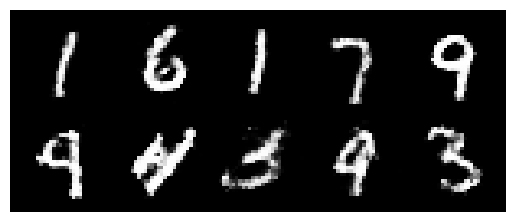

Epoch [61/150] | D Loss: 0.8348 | G Loss: 2.2206
Epoch [62/150] | D Loss: 0.7330 | G Loss: 1.7003
Epoch [63/150] | D Loss: 0.8508 | G Loss: 2.3996
Epoch [64/150] | D Loss: 0.9414 | G Loss: 1.3889
Epoch [65/150] | D Loss: 0.7498 | G Loss: 1.9697
Epoch [66/150] | D Loss: 0.8854 | G Loss: 1.9949
Epoch [67/150] | D Loss: 0.7123 | G Loss: 2.2139
Epoch [68/150] | D Loss: 0.7799 | G Loss: 1.7141
Epoch [69/150] | D Loss: 0.8654 | G Loss: 1.6722
Epoch [70/150] | D Loss: 0.9257 | G Loss: 2.2161
Epoch [71/150] | D Loss: 0.8171 | G Loss: 1.3523
Epoch [72/150] | D Loss: 0.8041 | G Loss: 1.6854
Epoch [73/150] | D Loss: 0.9322 | G Loss: 1.4868
Epoch [74/150] | D Loss: 0.9393 | G Loss: 1.4885
Epoch [75/150] | D Loss: 0.8891 | G Loss: 1.3715
Epoch [76/150] | D Loss: 0.9232 | G Loss: 2.3449
Epoch [77/150] | D Loss: 0.7407 | G Loss: 1.9313
Epoch [78/150] | D Loss: 0.9032 | G Loss: 1.8595
Epoch [79/150] | D Loss: 0.9328 | G Loss: 1.4512
Epoch [80/150] | D Loss: 0.8237 | G Loss: 1.5270


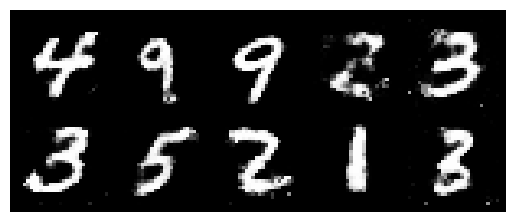

Epoch [81/150] | D Loss: 0.9220 | G Loss: 1.6743
Epoch [82/150] | D Loss: 0.8611 | G Loss: 1.5597
Epoch [83/150] | D Loss: 0.8553 | G Loss: 1.3402
Epoch [84/150] | D Loss: 0.8534 | G Loss: 1.5607
Epoch [85/150] | D Loss: 0.7568 | G Loss: 1.6712
Epoch [86/150] | D Loss: 0.9638 | G Loss: 1.4159
Epoch [87/150] | D Loss: 0.9784 | G Loss: 1.9606
Epoch [88/150] | D Loss: 1.0537 | G Loss: 0.9834
Epoch [89/150] | D Loss: 0.8515 | G Loss: 1.5618
Epoch [90/150] | D Loss: 0.8219 | G Loss: 1.4859
Epoch [91/150] | D Loss: 1.0911 | G Loss: 2.3784
Epoch [92/150] | D Loss: 0.9185 | G Loss: 1.8375
Epoch [93/150] | D Loss: 0.7774 | G Loss: 1.7978
Epoch [94/150] | D Loss: 0.8490 | G Loss: 1.7955
Epoch [95/150] | D Loss: 0.9406 | G Loss: 1.1808
Epoch [96/150] | D Loss: 1.0332 | G Loss: 2.0289
Epoch [97/150] | D Loss: 0.9274 | G Loss: 1.5785
Epoch [98/150] | D Loss: 0.8556 | G Loss: 1.3715
Epoch [99/150] | D Loss: 0.9585 | G Loss: 1.1657
Epoch [100/150] | D Loss: 0.9697 | G Loss: 1.3636


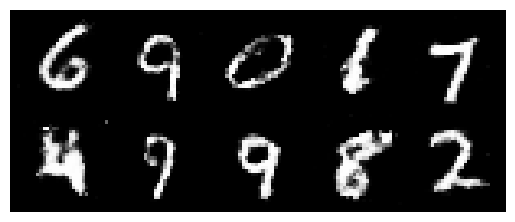

Epoch [101/150] | D Loss: 0.8172 | G Loss: 1.6786
Epoch [102/150] | D Loss: 0.8372 | G Loss: 1.6664
Epoch [103/150] | D Loss: 0.9468 | G Loss: 1.1870
Epoch [104/150] | D Loss: 0.8630 | G Loss: 1.3776
Epoch [105/150] | D Loss: 0.9668 | G Loss: 1.9160
Epoch [106/150] | D Loss: 0.8586 | G Loss: 1.5616
Epoch [107/150] | D Loss: 0.9708 | G Loss: 1.1437
Epoch [108/150] | D Loss: 0.9310 | G Loss: 1.4480
Epoch [109/150] | D Loss: 0.9254 | G Loss: 1.4729
Epoch [110/150] | D Loss: 0.8874 | G Loss: 1.2911
Epoch [111/150] | D Loss: 0.9153 | G Loss: 1.6694
Epoch [112/150] | D Loss: 0.9466 | G Loss: 1.5281
Epoch [113/150] | D Loss: 0.9480 | G Loss: 1.1251
Epoch [114/150] | D Loss: 0.9664 | G Loss: 1.1745
Epoch [115/150] | D Loss: 1.0962 | G Loss: 1.2731
Epoch [116/150] | D Loss: 1.0148 | G Loss: 1.9466
Epoch [117/150] | D Loss: 0.9558 | G Loss: 1.3452
Epoch [118/150] | D Loss: 0.8998 | G Loss: 1.3720
Epoch [119/150] | D Loss: 0.9150 | G Loss: 1.6294
Epoch [120/150] | D Loss: 0.9245 | G Loss: 1.3023


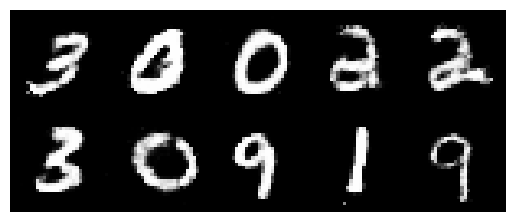

Epoch [121/150] | D Loss: 1.0221 | G Loss: 1.5659
Epoch [122/150] | D Loss: 0.8620 | G Loss: 1.2002
Epoch [123/150] | D Loss: 1.0010 | G Loss: 1.6964
Epoch [124/150] | D Loss: 1.1153 | G Loss: 1.3161
Epoch [125/150] | D Loss: 0.9841 | G Loss: 1.1648
Epoch [126/150] | D Loss: 0.8951 | G Loss: 1.0625
Epoch [127/150] | D Loss: 1.1016 | G Loss: 1.2989
Epoch [128/150] | D Loss: 1.0383 | G Loss: 1.2121
Epoch [129/150] | D Loss: 0.9152 | G Loss: 1.2575
Epoch [130/150] | D Loss: 0.9742 | G Loss: 1.4921
Epoch [131/150] | D Loss: 0.9841 | G Loss: 1.4415
Epoch [132/150] | D Loss: 0.8669 | G Loss: 1.0851
Epoch [133/150] | D Loss: 1.0248 | G Loss: 1.5582
Epoch [134/150] | D Loss: 0.9533 | G Loss: 1.0086
Epoch [135/150] | D Loss: 0.9189 | G Loss: 1.2970
Epoch [136/150] | D Loss: 0.9778 | G Loss: 1.9863
Epoch [137/150] | D Loss: 0.9877 | G Loss: 1.4921
Epoch [138/150] | D Loss: 1.1279 | G Loss: 0.9508
Epoch [139/150] | D Loss: 0.9458 | G Loss: 1.2473
Epoch [140/150] | D Loss: 0.9312 | G Loss: 1.3064


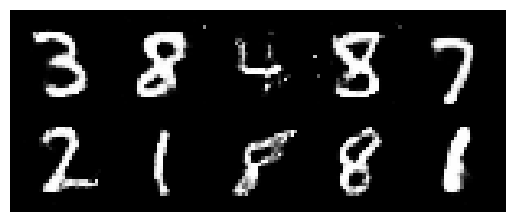

Epoch [141/150] | D Loss: 1.0324 | G Loss: 1.4280
Epoch [142/150] | D Loss: 0.8538 | G Loss: 1.4133
Epoch [143/150] | D Loss: 1.0393 | G Loss: 1.5255
Epoch [144/150] | D Loss: 1.0334 | G Loss: 1.2501
Epoch [145/150] | D Loss: 1.0737 | G Loss: 1.5036
Epoch [146/150] | D Loss: 0.9206 | G Loss: 1.4423
Epoch [147/150] | D Loss: 0.9904 | G Loss: 1.2069
Epoch [148/150] | D Loss: 1.0551 | G Loss: 1.7875
Epoch [149/150] | D Loss: 0.8999 | G Loss: 1.3725
Epoch [150/150] | D Loss: 1.0182 | G Loss: 1.3712


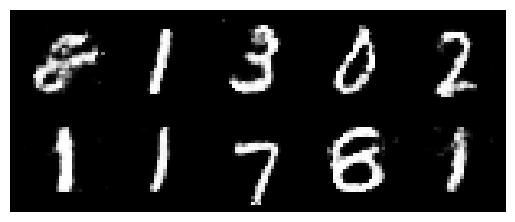

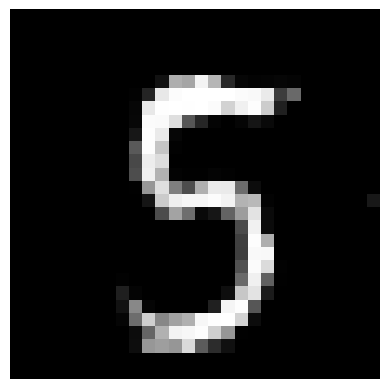

In [31]:



# Generating and saving images using the trained generator
def generate_and_save_images(generator, epoch, latent_dim, n_samples=10):
    generator.eval()
    noise = torch.randn(n_samples, latent_dim).to(device)
    labels = torch.randint(0, 10, (n_samples,)).to(device)
    with torch.no_grad():
        fake_images = generator(noise, labels).cpu()

    # Create a grid of generated images
    grid = make_grid(fake_images, nrow=5, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.savefig(f'generated_images_epoch_{epoch}.png')
    plt.show()
# Training loop (for reference)
# Training loop (for reference)
epochs = 150
n_critic = 5

for epoch in range(epochs):
    for i, (real_images, labels) in enumerate(train_loader):
        real_images, labels = real_images.to(device), labels.to(device)

        # Train the discriminator multiple times
        d_loss = 0
        for _ in range(n_critic):
            optimizer_d.zero_grad()
            real_validity = discriminator(real_images, labels)
            real_loss = criterion(real_validity, torch.ones(real_images.size(0), 1).to(device))

            noise = torch.randn(real_images.size(0), latent_dim).to(device)
            fake_labels = torch.randint(0, 10, (real_images.size(0),)).to(device)
            fake_images = generator(noise, fake_labels)
            fake_validity = discriminator(fake_images.detach(), fake_labels)
            fake_loss = criterion(fake_validity, torch.zeros(real_images.size(0), 1).to(device))

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_d.step()

        # Train the generator
        optimizer_g.zero_grad()
        noise = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_labels = torch.randint(0, 10, (real_images.size(0),)).to(device)
        fake_images = generator(noise, fake_labels)
        fake_validity = discriminator(fake_images, fake_labels)
        g_loss = criterion(fake_validity, torch.ones(real_images.size(0), 1).to(device))

        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch + 1}/{epochs}] | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}')

    # Save the model and generated images every 10th epoch
    if (epoch + 1) % 30 == 0:
        save_model(generator, discriminator, epoch + 1)
        generate_and_save_images(generator, epoch + 1, latent_dim)



# Generate images after training
generate_and_save_images(generator, epochs, latent_dim)

# Function to generate an image given a specific label and noise
def generate_image(generator, latent_dim, label):
    generator.eval()
    noise = torch.randn(1, latent_dim).to(device)
    label_tensor = torch.tensor([label]).to(device)
    with torch.no_grad():
        generated_image = generator(noise, label_tensor).cpu()

    plt.imshow(generated_image.view(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Example: Generate an image of label 5
generate_image(generator, latent_dim, label=5)


In [1]:
generate_image(generator, latent_dim, label=3)

NameError: name 'generate_image' is not defined